# Lab 2

In this lab exercise, you will look at applying different noise removal filters and investigate the effect on edge detection.

**You are asked to write a short (no more than 2 pages) report of your work**, answering specific questions, and showing example images. This work is not assessed (it will not count toward your module mark) but you will get formative feedback

In [2]:
# Imports
import skimage
import scipy
import time
from matplotlib import pyplot as plt
import numpy as np
from filters import gaussian_filter_3x3, gaussian_filter_5x5 
from utils import show_rgb_image, show_binary_image, sample_gaussian, zero_cross

### Task 1

- Load the shakey image using the ```skimage.io.imread``` function

- Using the built-in procedure ```scipy.signal.convolve2D``` convolve the image with the 3x3 Gaussian filter, and then the 5x5 filter. Can you see any difference between them? Try applying an edge filter to each and thresholding. Refer to the previous assignment to understand the convolve2d function.

**QUESTION 1: Can you describe the effect in comparison with applying the edge filter to the image directly?**

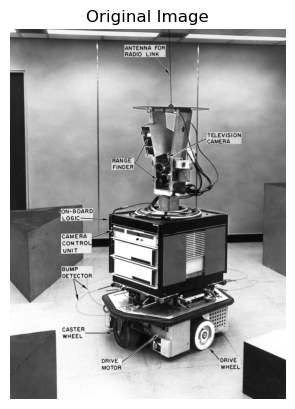

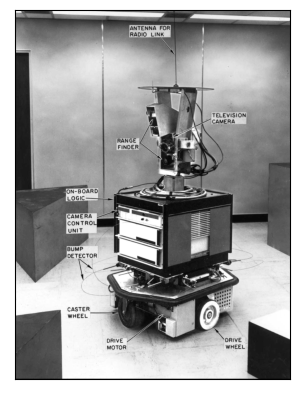

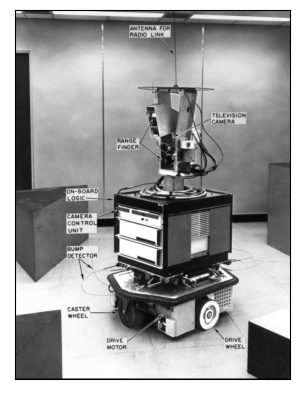

Shakey raw values [[254 254 254 ... 131 122 122]
 [254 254 254 ... 120 113 113]
 [254 254 254 ... 121 113 113]
 ...
 [ 83  81  78 ...  39  39  39]
 [ 83  81  78 ...  41  41  41]
 [ 83  81  78 ...  43  43  43]]


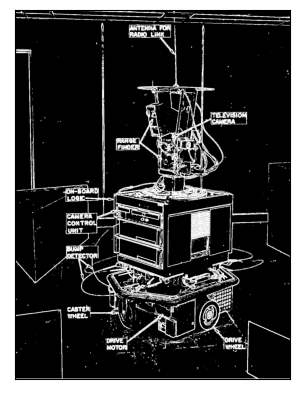

Shakey gaussian filter 3x3


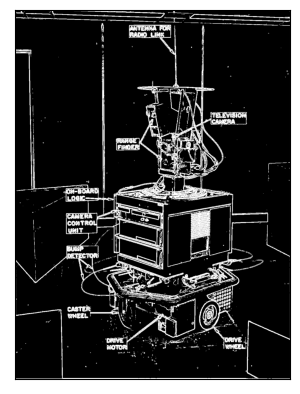

Shakey gaussian filter 5x5


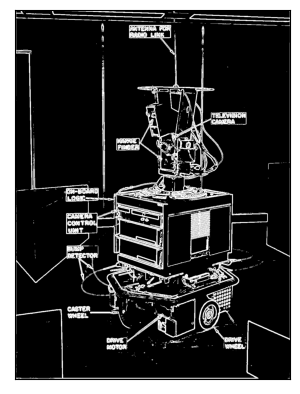

In [55]:
# Complete Task 1 here
from scipy import signal
from filters import sobel_x, sobel_y

# Read image
shakey = skimage.io.imread('shakey.jpg')[:,:,0] #Extract the Green Channel

# Display the image
plt.imshow(shakey,cmap="gray")
plt.title("Original Image")
plt.axis('off')
plt.show()

#print("Shakey raw values", shakey)

filtered_3 = signal.convolve2d(shakey, gaussian_filter_3x3)
filtered_5 = signal.convolve2d(shakey, gaussian_filter_5x5)
show_binary_image(filtered_3)
show_binary_image(filtered_5)
def apply_edge_filter(
        img,x_filter,y_filter, magnitude=lambda x,y: np.sqrt(x**2 + y**2)
):
    return magnitude(signal.convolve2d(img, x_filter), signal.convolve2d(img, y_filter))
threshold = 90

print("Shakey raw values", shakey)
show_binary_image(apply_edge_filter(shakey, sobel_x, sobel_y)> threshold)

print("Shakey gaussian filter 3x3")
show_binary_image(apply_edge_filter(filtered_3, sobel_x, sobel_y)> threshold)

print("Shakey gaussian filter 5x5")
show_binary_image(apply_edge_filter(filtered_5, sobel_x, sobel_y)> threshold)



Applying the gaussian filter results in a smoother image. When the original edge image image is compared to the gaussian filtered edge image, there is far less noise in the gaussian filtered edge image.

### Task 2

Using the function ```sample_gaussian(std_dev,mean,vec)``` you can create a discrete sample from a Gaussian (Normal) density. You need to specify the mean(keep it at 0, think about why) and the standard deviation **std_dev**. You should also specify an input vector in the form of ```np.arange(min=-x,max=x+1,step=1,dtype=np.float32)``` which will produce a sample of size 2x+1.

So you can create larger and smaller vectors by altering the step size or the limits of the vector (the min and max values). 

Now try creating a 9x9 Gaussian mask. To do this you will need to use matrix multiplication in the right way. 

Try some initial exploratory experiments with this, what happens to the image as you increase the size of the mask? What happens as you increase the size of **std_dev**? Make detailed notes as you proceed about what you did and what you observed.

Now apply gradient operators such as the Sobel operators to the blurred images. What happens to the edges in the heavily blurred case?

**Question 2: What  is  the  effect  of  increasing  the  size  of  the  Gaussian  Filter  (3x3  versus  5x5  for  example)?** 
**What is the effect of changing the standard deviation s? Why do you see what you see?**

[-3.   -2.25 -1.5  -0.75  0.    0.75  1.5   2.25  3.  ]
(9, 9)
[[0.9991004  0.99929712 0.99943766 0.99952199 0.9995501  0.99952199
  0.99943766 0.99929712 0.9991004 ]
 [0.99929712 0.99949388 0.99963444 0.99971879 0.99974691 0.99971879
  0.99963444 0.99949388 0.99929712]
 [0.99943766 0.99963444 0.99977503 0.99985938 0.99988751 0.99985938
  0.99977503 0.99963444 0.99943766]
 [0.99952199 0.99971879 0.99985938 0.99994375 0.99997188 0.99994375
  0.99985938 0.99971879 0.99952199]
 [0.9995501  0.99974691 0.99988751 0.99997188 1.         0.99997188
  0.99988751 0.99974691 0.9995501 ]
 [0.99952199 0.99971879 0.99985938 0.99994375 0.99997188 0.99994375
  0.99985938 0.99971879 0.99952199]
 [0.99943766 0.99963444 0.99977503 0.99985938 0.99988751 0.99985938
  0.99977503 0.99963444 0.99943766]
 [0.99929712 0.99949388 0.99963444 0.99971879 0.99974691 0.99971879
  0.99963444 0.99949388 0.99929712]
 [0.9991004  0.99929712 0.99943766 0.99952199 0.9995501  0.99952199
  0.99943766 0.99929712 0.9991004 ]]


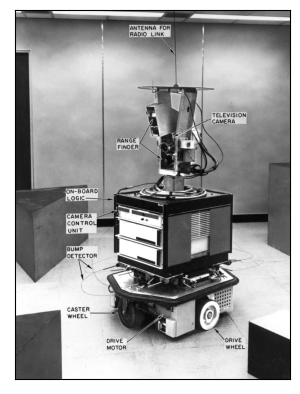

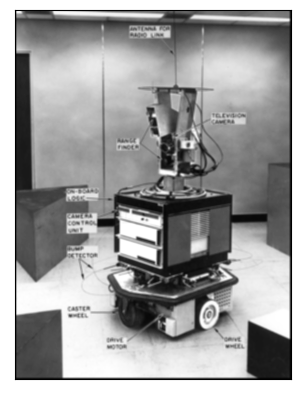

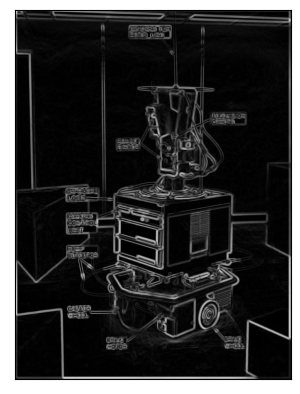

In [47]:

# Complete Task 2 here
import numpy as np

# Let's define a function to sample from a Gaussian distribution
def sample_gaussian(std_dev, mean, vec):
    x, y = np.meshgrid(vec, vec)
    return np.exp(-((x-mean)**2 + (y-mean)**2) / (2*std_dev**2))

# Assuming we want 3 standard deviations for the range of our 9x9 mask
# And a standard deviation of 1 for simplicity
std_dev = 100
mean = 0
size = 9
step = 6 / (size-1)  # To cover -3 to +3 standard deviations over 9 steps
vec = np.arange(-3, 3 + step, step)
print(vec)

# Now create the Gaussian mask
gaussian_mask = sample_gaussian(std_dev, mean, vec)
print(gaussian_mask.shape)
print(gaussian_mask)

filtered_9 = signal.convolve2d(shakey, gaussian_mask)

show_binary_image(shakey)
show_binary_image(filtered_9)
show_binary_image(apply_edge_filter(filtered_9, sobel_x, sobel_y))





Increasing the standard deviation shifts the weighting of the convolution away from the centre pixel and gives increased weighting to the pixels furtuer out. This results in the image appearing increasingly blurred. 

### Task 3

Now compare the speed of applying two large 1D Gaussian filters in sequence, with applying a single equivalent 2D Gaussian filter that results from their multiplication. To test the CPU time used you can use a function called [time.monotonic()](https://docs.python.org/3/library/time.html#time.monotonic) . 

- Can you detect differences in the CPU times as the mask sizes  increase? 
- You should check that the results are the same by examining areas of the image matrix in detail. 
- Are there any effects due to small floating point errors? 

In [48]:
# Complete Task 3 here

import time

# Define a function to apply a 1D Gaussian filter sequentially in both directions
def apply_1d_gaussian_filters(image, gaussian_1d):
    # Apply the 1D Gaussian filter across rows
    row_filtered = np.apply_along_axis(lambda r: np.convolve(r, gaussian_1d, mode='same'), 1, image)
    # Apply the 1D Gaussian filter across columns
    col_filtered = np.apply_along_axis(lambda r: np.convolve(r, gaussian_1d, mode='same'), 0, row_filtered)
    return col_filtered

# Define a function to apply a 2D Gaussian filter
def apply_2d_gaussian_filter(image, gaussian_2d):
    from scipy.signal import convolve2d
    return convolve2d(image, gaussian_2d, mode='same')

# Generate a random image matrix
image_size = 100  # Use a larger image size to better notice the time difference
image_matrix = np.random.rand(image_size, image_size)

# Generate 1D Gaussian filter
gaussian_1d = np.exp(-vec**2 / (2*std_dev**2))

# Generate 2D Gaussian filter (same as the mask we created earlier)
gaussian_2d = sample_gaussian(std_dev, mean, vec)

# Time the application of two 1D Gaussian filters in sequence
start_time_1d = time.monotonic()
filtered_image_1d = apply_1d_gaussian_filters(image_matrix, gaussian_1d)
end_time_1d = time.monotonic()

# Time the application of a single 2D Gaussian filter
start_time_2d = time.monotonic()
filtered_image_2d = apply_2d_gaussian_filter(image_matrix, gaussian_2d)
end_time_2d = time.monotonic()

# Calculate elapsed times
elapsed_time_1d = end_time_1d - start_time_1d
elapsed_time_2d = end_time_2d - start_time_2d

# Compare the results of the two methods
comparison = np.allclose(filtered_image_1d, filtered_image_2d, atol=1e-6)

elapsed_time_1d, elapsed_time_2d, comparison


(0.0017753339998307638, 0.002299542000400834, True)

The execution time of applying a 2D convolution is far greater than that of applying two 1D filters. These differences increase as the size of the filter increases. When we compare the number of pixels which are the same we notice that only 7% of pixels are unchanged. However, visually the differences are very hard to distinguish. 

### Task 4

- Look at your Lecture notes and produce a 2D Laplacian filter. 

- Now try applying the Laplacian operator to the Shakey image. You will need to calculate the zero-crossing for edges: you can use the provided zero_corss function, where I_in is the image convolved with the Laplacian, and I_out is the calculated edges. 

- Think about the result. Why does it produce a poor result compared to the other operators?

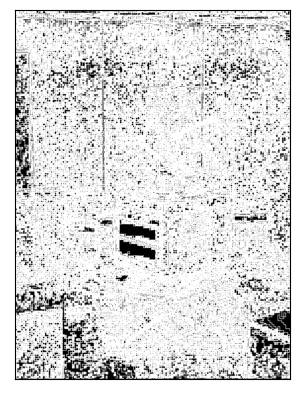

In [ ]:
# Complete Task 4 here

# Define a 2D Laplacian filter
laplacian_filter = np.array([[0, -1, 0],
                             [-1, 4, -1],
                             [0, -1, 0]])

# Simple zero crossing detector function


# Convolve the random image with the Laplacian filter
laplacian_convolved = signal.convolve2d(shakey, laplacian_filter, mode='same')

# Apply the zero crossing detector
edges_detected = zero_cross(laplacian_convolved)

# Display a small part of the results for visualization
edges_detected[:10, :10]

show_binary_image(edges_detected)


The resulting image is very noisy. This because Laplacian filter is the sum of two second order derivatives in x-and y- axis which amplifies noise easily.

# Task 5

I mentioned the Laplacian of the Gaussian in the lecture. How could you combine the idea of 
the Laplacian operator with the idea of Gaussian smoothing? Try out your ideas.

/var/folders/6s/0pps1mlj4g5dbk7_wt_kd_0r0000gn/T/ipykernel_95681/776258351.py:17: RuntimeWarning: overflow encountered in scalar multiply
  if np.max(neighborhood) * np.min(neighborhood) < 0:


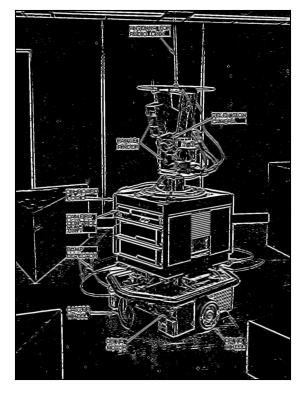

In [63]:
# Complete Task 5 here

from scipy.ndimage import gaussian_laplace

# Standard deviation for the Gaussian smoothing
std_dev = 2

# Apply Gaussian smoothing followed by the Laplacian operator (LoG)
# The scipy.ndimage.gaussian_laplace function does this in one step
log_image = gaussian_laplace(shakey, sigma=std_dev)

show_binary_image(log_image)

